<a href="https://colab.research.google.com/github/ash-rulz/Langchain/blob/main/ExpressionLanguage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LangChain Expression Language

In [2]:
!pip install -q -U langchain transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 794.4/794.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.4 MB/s eta 0:00:00


## Example 1: Simple

Simple prompt -> llm -> output parser chain

In [3]:
#from langchain.chat_models import ChatOpenAI
from transformers import AutoTokenizer, AutoModelForCausalLM
import transformers
import torch
from langchain import HuggingFacePipeline
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

#Define the prompt template
prompt = ChatPromptTemplate.from_template("tell me a short joke about {topic}")

#Define the model
model = "tiiuae/falcon-7b-instruct"
tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    model_kwargs={"temperature" : 0, "max_length" : 128}
)
llm = HuggingFacePipeline(pipeline=pipeline)

tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

configuration_falcon.py:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- configuration_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.



modeling_falcon.py:   0%|          | 0.00/56.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/tiiuae/falcon-7b-instruct:
- modeling_falcon.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin.index.json:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

In [4]:
#Define the outpur parser
output_parser = StrOutputParser()

#Chain it all together
chain = prompt | llm | output_parser

#Run the chain
chain.invoke({"topic": "ice cream"})

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1518: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.p

'\nWhy did the ice cream fall on the floor? Because it was too good to be true!'

This is same as:
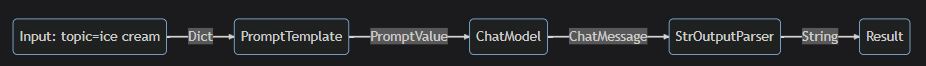

In [5]:
#Investigating what the output of prompt was
prompt_value = prompt.invoke({"topic": "ice cream"})
prompt_value

ChatPromptValue(messages=[HumanMessage(content='tell me a short joke about ice cream')])

In [6]:
#Investigating what the output of llm was
llm_output = llm.invoke(prompt_value)
llm_output

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


'\nWhy did the ice cream fall on the floor? Because it was too good to be true!'

## Example 2: With RAGs
Here we use RAG as a use case, and see how the Langchain expression language can be used. This will help the understand the finer details of how this concept is implemented in [RAG_Langchain](https://colab.research.google.com/drive/1Z4UW-Ia5leLa9YL8g0z5FbXVSHoMfudH#scrollTo=rIOKPJwwQSSv).

In this example, a [Doc array vector store](https://python.langchain.com/docs/integrations/vectorstores/docarray_in_memory) is used. It provides a parent child representation of data, plus it is for multi-modal data. A decent explanation by Connor Shorten can be found [here](https://www.youtube.com/watch?v=Ii4uCcjfrgY&t=427s).

In [14]:
import locale
print(locale.getpreferredencoding())

ANSI_X3.4-1968


In [15]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [20]:
#Check https://stackoverflow.com/questions/56081324/why-are-google-colab-shell-commands-not-working
!pip install -q -U docarray sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.3 MB/s eta 0:00:00


In [35]:
from langchain.vectorstores import DocArrayInMemorySearch
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableParallel, RunnablePassthrough

#Create embeddings for the vector store
model_path = "sentence-transformers/all-MiniLM-L6-v2"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}
embeddings = HuggingFaceEmbeddings(
    model_name=model_path,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

#Create the doc array vector store
vectorstore = DocArrayInMemorySearch.from_texts(
    ["harrison worked at kensho", "bears like to eat honey"],
    embedding=embeddings
)
retriever = vectorstore.as_retriever()

#Create the prompt template
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

#We use the previously created llm model - llm. output_parser is also the same.

#Create the chain
setup_and_retrieval = RunnableParallel(
    {"context": retriever, "question": RunnablePassthrough()}
)
chain = setup_and_retrieval | prompt | llm | output_parser

#Run the chain
question = "where did harrison work?"
chain.invoke(question)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


'Answer: Harrison worked at kensho.'

In [26]:
retriever_result = retriever.invoke(question)
retriever_result

[Document(page_content='harrison worked at kensho'),
 Document(page_content='bears like to eat honey')]

In [30]:
#Get the output of the RunnableParallel
prompt_input_value = setup_and_retrieval.invoke(question)
prompt_input_value #Gets the context and the question

{'context': [Document(page_content='harrison worked at kensho'),
  Document(page_content='bears like to eat honey')],
 'question': 'where did harrison work?'}

In [34]:
prompt_output = prompt.invoke({"context": prompt_input_value['context'],
               "question": prompt_input_value['question']})
prompt_output

ChatPromptValue(messages=[HumanMessage(content="Answer the question based only on the following context:\n[Document(page_content='harrison worked at kensho'), Document(page_content='bears like to eat honey')]\n\nQuestion: where did harrison work?\n")])

In [36]:
llm_output = llm.invoke(prompt_output)
llm_output

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


'Answer: Harrison worked at kensho.'

This can be summarized as shown below:
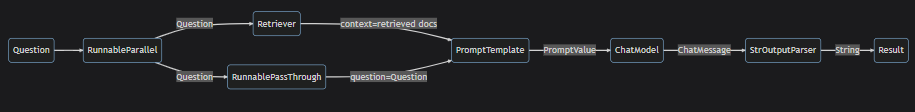

More explnation of [RunnableParallel](https://python.langchain.com/docs/expression_language/how_to/map), [RunnablePassThrough](https://python.langchain.com/docs/expression_language/how_to/passthrough), [RunnableLambda](https://python.langchain.com/docs/expression_language/how_to/functions), [RunnableBranch](https://python.langchain.com/docs/expression_language/how_to/routing)

# References
1. [Langhchain expression language documentation](https://python.langchain.com/docs/expression_language/get_started)
2. [Langchain Expression Language Overview - Part 1](https://www.youtube.com/watch?v=moJRxxEddzU&t=51s). More advanced techniques can be found [here](https://www.youtube.com/watch?v=zREUGA_v3xc&t=8s).
3. [LangChain Series: Prompt Tools 101 - Simple Prompt Templates](https://www.youtube.com/watch?v=xnZfTuvVVIY&t=1s)